## Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import numpy as np
from scipy.stats import zscore

## Loading the Dataset

In [2]:
# load dataset from csv file
df = pd.read_csv('./../wells/Anderson_East_2-35 Run Data.csv')

## Analyzing the Dataset

In [3]:
df

,Run Number,Well,Time - DROP,CP - DROP (psi),TP - DROP (psi),LP - DROP (psi),Liquid Load - DROP (psi),Fluid in Tubing - DROP (bbl),Time - ARRIVING,CP - ARRIVING (psi),...,Lift Pressure - ARRIVING (psi),Lift Factor - ARRIVING,Rise Time (m),Rise Velocity (fpm),Good,Miss,Open Duration (m),Close Duration (m),Gas,Liquid
0,1669,Anderson_East_2-35,2/5/2025 23:08,271,62,50.76,209,2.67,2/5/2025 22:54,275,...,228.44,1.43,9.066667,497.316176,1,0,13.550000,0.850000,0.14,NaN
1,1668,Anderson_East_2-35,2/5/2025 22:53,273,61,50.05,212,2.70,2/5/2025 22:40,276,...,223.93,1.40,8.250000,546.545455,1,0,13.750000,0.850000,0.12,NaN
2,1667,Anderson_East_2-35,2/5/2025 22:39,275,65,54.55,210,2.68,2/5/2025 22:25,276,...,222.89,1.40,8.100000,556.666667,1,0,13.716667,0.800000,0.14,NaN
3,1666,Anderson_East_2-35,2/5/2025 22:24,275,67,56.24,208,2.65,2/5/2025 22:11,274,...,220.80,1.38,8.133333,554.385246,1,0,13.300000,0.850000,0.13,NaN
4,1665,Anderson_East_2-35,2/5/2025 22:10,273,67,56.25,206,2.63,2/5/2025 21:57,277,...,224.33,1.34,7.966667,565.983264,1,0,13.233333,0.766667,0.13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1664,5,Anderson_East_2-35,1/10/2025 15:42,293,222,213.66,71,0.91,1/10/2025 15:38,300,...,85.70,1.45,0.266667,16908.750000,1,0,4.166667,0.883333,0.00,NaN
1665,4,Anderson_East_2-35,1/10/2025 15:37,299,223,215.22,76,0.97,1/10/2025 15:27,296,...,79.75,1.56,9.033333,499.151292,1,0,10.083333,0.783333,0.00,NaN
1666,3,Anderson_East_2-35,1/10/2025 15:26,296,226,217.86,70,0.89,1/10/2025 15:25,296,...,79.30,1.50,0.266667,16908.750000,1,0,1.666667,0.783333,0.00,NaN
1667,2,Anderson_East_2-35,1/10/2025 15:24,294,227,219.75,67,0.85,1/10/2025 15:14,297,...,76.20,1.47,8.466667,532.559055,1,0,9.416667,0.883333,0.00,NaN


In [4]:
# removing negative values from gas production

df['Gas'] = df['Gas'].clip(lower=0)


In [5]:
df.describe()

,Run Number,CP - DROP (psi),TP - DROP (psi),LP - DROP (psi),Liquid Load - DROP (psi),Fluid in Tubing - DROP (bbl),CP - ARRIVING (psi),TP - ARRIVING (psi),LP - ARRIVING (psi),Lift Pressure - ARRIVING (psi),Lift Factor - ARRIVING,Rise Time (m),Rise Velocity (fpm),Good,Miss,Open Duration (m),Close Duration (m),Gas,Liquid
count,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,0.0
mean,835.000000,287.444578,94.483523,83.541216,192.961055,2.461744,288.486519,141.820851,80.665392,207.821132,1.818922,9.285191,1286.957572,0.944877,0.055123,19.229239,3.489305,0.122666,NaN
std,481.943116,22.467511,45.289667,46.907007,47.048463,0.600342,21.934185,47.159301,46.853570,48.023197,3.312858,8.366285,3407.361456,0.228288,0.228288,119.857887,66.099724,0.049545,NaN
min,1.000000,264.000000,7.000000,0.020000,44.000000,0.560000,265.000000,7.000000,0.020000,55.190000,0.880000,0.166667,64.862143,0.000000,0.000000,0.983333,0.750000,0.000000,NaN
25%,418.000000,277.000000,70.000000,57.200000,197.000000,2.510000,279.000000,116.000000,54.280000,211.930000,1.340000,6.666667,518.275862,1.000000,0.000000,11.916667,0.800000,0.120000,NaN
50%,835.000000,281.000000,75.000000,63.740000,206.000000,2.630000,282.000000,124.000000,60.930000,222.340000,1.390000,7.866667,573.177966,1.000000,0.000000,12.966667,0.850000,0.130000,NaN
75%,1252.000000,287.000000,87.000000,76.230000,213.000000,2.720000,288.000000,139.000000,73.960000,228.910000,1.470000,8.700000,676.350000,1.000000,0.000000,14.283333,0.866667,0.150000,NaN
max,1669.000000,466.000000,280.000000,272.890000,459.000000,5.860000,467.000000,340.000000,273.210000,427.810000,54.110000,69.516667,27054.000000,1.000000,1.000000,4805.400000,2695.433333,0.970000,NaN


## Preprocessing the Dataset

### Cleaning & Removing Outliers from the Dataset

In [6]:
df_z = pd.read_csv('./../wells/Anderson_East_2-35 Run Data.csv')

# shift CP-DROP, TP-DROP, LP-DROP by -1
df_z['CP - DROP (psi)'] = df_z['CP - DROP (psi)'].shift(-1)
df_z['TP - DROP (psi)'] = df_z['TP - DROP (psi)'].shift(-1)
df_z['LP - DROP (psi)'] = df_z['LP - DROP (psi)'].shift(-1)
df_z['Liquid Load - DROP (psi)'] = df_z['Liquid Load - DROP (psi)'].shift(-1)
df_z['Fluid in Tubing - DROP (bbl)'] = df_z['Fluid in Tubing - DROP (bbl)'].shift(-1)

# drop column liquid load
df_z = df_z.drop(columns=['Liquid'])
df_z = df_z.dropna()

In [7]:
df_z.head(10)

,Run Number,Well,Time - DROP,CP - DROP (psi),TP - DROP (psi),LP - DROP (psi),Liquid Load - DROP (psi),Fluid in Tubing - DROP (bbl),Time - ARRIVING,CP - ARRIVING (psi),...,LP - ARRIVING (psi),Lift Pressure - ARRIVING (psi),Lift Factor - ARRIVING,Rise Time (m),Rise Velocity (fpm),Good,Miss,Open Duration (m),Close Duration (m),Gas
0,1669,Anderson_East_2-35,2/5/2025 23:08,273.0,61.0,50.05,212.0,2.70,2/5/2025 22:54,275,...,46.56,228.44,1.43,9.066667,497.316176,1,0,13.550000,0.850000,0.14
1,1668,Anderson_East_2-35,2/5/2025 22:53,275.0,65.0,54.55,210.0,2.68,2/5/2025 22:40,276,...,52.07,223.93,1.40,8.250000,546.545455,1,0,13.750000,0.850000,0.12
2,1667,Anderson_East_2-35,2/5/2025 22:39,275.0,67.0,56.24,208.0,2.65,2/5/2025 22:25,276,...,53.11,222.89,1.40,8.100000,556.666667,1,0,13.716667,0.800000,0.14
3,1666,Anderson_East_2-35,2/5/2025 22:24,273.0,67.0,56.25,206.0,2.63,2/5/2025 22:11,274,...,53.20,220.80,1.38,8.133333,554.385246,1,0,13.300000,0.850000,0.13
4,1665,Anderson_East_2-35,2/5/2025 22:10,275.0,67.0,55.18,208.0,2.65,2/5/2025 21:57,277,...,52.67,224.33,1.34,7.966667,565.983264,1,0,13.233333,0.766667,0.13
5,1664,Anderson_East_2-35,2/5/2025 21:56,278.0,65.0,54.59,213.0,2.72,2/5/2025 21:43,280,...,51.03,228.97,1.36,7.966667,565.983264,1,0,12.900000,0.750000,0.12
6,1663,Anderson_East_2-35,2/5/2025 21:42,274.0,66.0,54.03,208.0,2.65,2/5/2025 21:29,275,...,51.91,223.09,1.45,8.133333,554.385246,1,0,13.550000,0.850000,0.14
7,1662,Anderson_East_2-35,2/5/2025 21:28,273.0,67.0,56.38,206.0,2.63,2/5/2025 21:15,274,...,54.25,219.75,1.35,7.716667,584.319654,1,0,13.133333,0.833333,0.14
8,1661,Anderson_East_2-35,2/5/2025 21:14,271.0,69.0,53.22,202.0,2.58,2/5/2025 21:02,272,...,53.55,218.45,1.54,8.200000,549.878049,1,0,12.433333,0.850000,0.13
9,1660,Anderson_East_2-35,2/5/2025 21:01,274.0,62.0,49.20,212.0,2.70,2/5/2025 20:19,275,...,46.06,228.94,1.48,9.666667,466.448276,1,0,41.883333,0.833333,0.13


In [8]:
# Load dataset
# df_z = pd.read_csv('./../wells/Anderson_East_2-35 Run Data.csv')

# df_z = df_z.drop(columns=['Liquid'])
all_columns = df_z.columns
# df_z['Gas'] = df_z['Gas'].clip(lower=0)

# features to retain
retain_columns = ['Time - DROP', 'Time - ARRIVING', 'Run Number', "Well"]

# Identify numerical features (excluding retained ones)
numeric_columns = df_z.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns = [col for col in numeric_columns if col not in retain_columns]

# Compute Z-scores for numerical columns
z_scores = df_z[numeric_columns].apply(zscore)

# Define outlier mask (threshold |Z| > 3)
outlier_mask = (z_scores.abs() > 3)
outlier_rows = outlier_mask.any(axis=1)

# mask for gas production being zero
gas_zero_mask = (df_z['Gas'] == 0)

# Replace outlier rows' non-retained columns with NaN
df_z.loc[outlier_rows, numeric_columns] = np.nan

# Replacing all features except 'Time - Drop' and 'Time - Arriving' with NaN when 'Gas' is zero
df_z.loc[gas_zero_mask, [col for col in all_columns if col not in retain_columns]] = np.nan

# Save the cleaned dataset
df_z.to_csv('cleaned_well_data_Z.csv', index=False)

In [9]:
df_z.describe()

,Run Number,CP - DROP (psi),TP - DROP (psi),LP - DROP (psi),Liquid Load - DROP (psi),Fluid in Tubing - DROP (bbl),CP - ARRIVING (psi),TP - ARRIVING (psi),LP - ARRIVING (psi),Lift Pressure - ARRIVING (psi),Lift Factor - ARRIVING,Rise Time (m),Rise Velocity (fpm),Good,Miss,Open Duration (m),Close Duration (m),Gas
count,1668.00000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.0,1451.0,1451.000000,1451.000000,1451.000000
mean,835.50000,281.390076,83.884218,72.384163,197.505858,2.519759,282.556168,129.773260,69.627567,212.928608,1.403653,7.718148,666.802582,1.0,0.0,15.121089,0.834229,0.135899
std,481.65444,6.493350,30.245120,31.674049,31.459538,0.401364,6.530996,25.110767,31.813109,33.139636,0.098583,2.098859,570.025033,0.0,0.0,12.969100,0.035514,0.020942
min,2.00000,264.000000,58.000000,45.590000,55.000000,0.700000,265.000000,94.000000,41.910000,67.550000,1.190000,0.433333,182.059219,1.0,0.0,1.566667,0.750000,0.020000
25%,418.75000,277.000000,69.000000,56.615000,200.000000,2.550000,278.000000,115.000000,53.785000,215.530000,1.340000,6.800000,532.559055,1.0,0.0,12.100000,0.800000,0.120000
50%,835.50000,280.000000,74.000000,62.540000,207.000000,2.640000,281.000000,123.000000,59.710000,222.820000,1.390000,7.850000,574.394905,1.0,0.0,12.950000,0.850000,0.140000
75%,1252.25000,285.000000,80.000000,68.465000,212.000000,2.700000,286.000000,133.000000,65.830000,228.590000,1.450000,8.466667,663.088235,1.0,0.0,14.016667,0.850000,0.150000
max,1669.00000,307.000000,223.000000,215.370000,238.000000,3.040000,308.000000,243.000000,215.450000,254.830000,2.270000,24.766667,10405.384620,1.0,0.0,177.933333,0.916667,0.200000


## Feature Engineering

In [10]:
# Deriving Gas Rate
df_z['GasRate'] = df_z['Gas'] / df_z['Open Duration (m)']

# Deriving Fluid Rate
df_z['Fluidrate (bbl/m)'] = df_z['Fluid in Tubing - DROP (bbl)'] / df_z['Open Duration (m)']

# df_z = df_z.dropna()

# Deriving change in Lift Pressure Rate
df_z['Lift Pressure - DROP (psi)'] = df_z['CP - DROP (psi)'] - df_z['LP - DROP (psi)']

df_z['UpwardRate (psi/m)'] = (df_z['Lift Pressure - ARRIVING (psi)'] - df_z['Lift Pressure - DROP (psi)'])/ df_z['Close Duration (m)']

df_z.to_csv('cleaned_well_data_Z.csv', index=False)

In [11]:
df_z['UpwardRate (psi/m)'] 

0       6.458824
1       4.094118
2       5.162500
3       4.764706
4       5.882609
          ...   
1663         NaN
1664         NaN
1665         NaN
1666         NaN
1667         NaN
Name: UpwardRate (psi/m), Length: 1668, dtype: float64

In [12]:
# Create Plotly figure
fig = go.Figure()

# Add scatter plot (point cloud)
fig.add_trace(go.Scatter(
    x=df_z['Rise Time (m)'],
    y=df_z['GasRate'],
    mode='markers',
    marker=dict(size=6, color='blue', opacity=1),
    name='Gas Rate'
))

# Customize layout
fig.update_layout(
    title='Gas Rate vs Rise Time',
    xaxis_title='Rise Time (m)',
    yaxis_title='Gas Rate',
    # xaxis_range=[60, 4000],  # Set x-axis limits (adjust as needed)
    template='plotly_white'
)

# Show plot
fig.show()


In [13]:
# Create Plotly figure
fig = go.Figure()

# Add scatter plot (point cloud)
fig.add_trace(go.Scatter(
    x=df_z['Rise Velocity (fpm)'],
    y=df_z['GasRate'],
    mode='markers',
    marker=dict(size=6, color='red', opacity=1),
    name='Gas Rate'
))

# Customize layout
fig.update_layout(
    title='Gas Rate vs Rise Velocity',
    xaxis_title='Rise Velocity (fpm)',
    yaxis_title='Gas Rate',
    xaxis_range=[60, 4000],  # Set x-axis limits (adjust as needed)
    template='plotly_white'
)

# Show plot
fig.show()


In [14]:
# Create Plotly figure
fig = go.Figure()

# Add scatter plot (point cloud)
fig.add_trace(go.Scatter(
    x=df_z['Open Duration (m)'],
    y=df_z['GasRate'],
    mode='markers',
    marker=dict(size=6, color='green', opacity=1),
    name='Gas Rate'
))

# Customize layout
fig.update_layout(
    title='Gas Rate vs Open Duration',
    xaxis_title='Open Duration (m)',
    yaxis_title='Gas Rate',
    # xaxis_range=[0, 80],  # Set x-axis limits (adjust as needed)
    template='plotly_white'
)

# Show plot
fig.show()


In [15]:
# Create Plotly figure
fig = go.Figure()

# Add scatter plot
fig.add_trace(go.Scatter(
    x=df_z['Rise Velocity (fpm)'],  
    y=df_z['Rise Time (m)'],  
    mode='markers',  
    marker=dict(size=6, color='red', opacity=0.7),  
    name='Rise Time vs Velocity'
))

# Customize layout
fig.update_layout(
    title='Inverse Relationship: Rise Time vs Rise Velocity',
    xaxis_title='Rise Velocity (fpm)',
    yaxis_title='Rise Time (m)',
    template='plotly_white'
)

# Show plot
fig.show()


In [16]:
# Create Plotly figure
fig = go.Figure()

# Add scatter plot
fig.add_trace(go.Scatter(
    x=df_z['Lift Pressure - ARRIVING (psi)'],  
    y=df_z['Rise Velocity (fpm)'],  
    mode='markers',  
    marker=dict(size=6, color='red', opacity=0.7),  
    name='Rise Time vs Velocity'
))

# Customize layout
fig.update_layout(
    title='Lift Pressure vs Rise Velocity',
    xaxis_title='Lift Pressure (psi)',
    yaxis_title='Rise Velocity (fpm)',
    yaxis_range=[0, 2000],  # Set x-axis limits (adjust as needed)
    template='plotly_white'
)

# Show plot
fig.show()


In [17]:
# Create Plotly figure
fig = go.Figure()

# Add scatter plot (point cloud)
fig.add_trace(go.Scatter(
    x=df_z['Liquid Load - DROP (psi)'],
    y=df_z['GasRate'],
    mode='markers',
    marker=dict(size=6, color='blue', opacity=1),
    name='Gas Rate'
))

# Customize layout
fig.update_layout(
    title='Liquid Load vs Gas Rate',
    xaxis_title='Liquid Load (psi)',
    yaxis_title='Gas Rate',
    xaxis_range=[100, 240],  # Set x-axis limits (adjust as needed)
    template='plotly_white'
)

# Show plot
fig.show()


In [18]:
# Create Plotly figure
fig = go.Figure()

# Add scatter plot (point cloud)
fig.add_trace(go.Scatter(
    x=df_z['Fluidrate (bbl/m)'],
    y=df_z['GasRate'],
    mode='markers',
    marker=dict(size=6, color='green', opacity=1),
    name='Gas Rate'
))

# Customize layout
fig.update_layout(
    title='Fluid in Tubing Rate vs Gas Rate',
    xaxis_title='Fluid in Tubing Rate (bbl/m)',
    yaxis_title='Gas Rate',
    xaxis_range=[0, 0.6],  # Set x-axis limits (adjust as needed)
    template='plotly_white'
)

# Show plot
fig.show()


In [19]:
# Create Plotly figure
fig = go.Figure()

# Add scatter plot (point cloud)
fig.add_trace(go.Scatter(
    x=df_z['UpwardRate (psi/m)'],
    y=df_z['GasRate'],
    mode='markers',
    marker=dict(size=6, color='red', opacity=1),
    name='Gas Rate'
))

# Customize layout
fig.update_layout(
    title='Upward Rate vs Gas Rate',
    xaxis_title='Upward Rate (psi/m)',
    yaxis_title='Gas Rate',
    # xaxis_range=[0, 50],  # Set x-axis limits (adjust as needed)
    template='plotly_white'
)

# Show plot
fig.show()


In [20]:
# Create Plotly figure
fig = go.Figure()

# Add scatter plot (point cloud)
fig.add_trace(go.Scatter(
    x=df_z['Lift Pressure - DROP (psi)'],
    y=df_z['GasRate'],
    mode='markers',
    marker=dict(size=6, color='blue', opacity=1),
    name='Gas Rate'
))

# Customize layout
fig.update_layout(
    title='Lift Pressure (DROP) of Previous Run vs Gas Rate',
    xaxis_title='Lift Pressure (psi)',
    yaxis_title='Gas Rate',
    # xaxis_range=[0, 50],  # Set x-axis limits (adjust as needed)
    template='plotly_white'
)

# Show plot
fig.show()


In [21]:
df_z = df_z.drop(columns=['Good', 'Miss'])


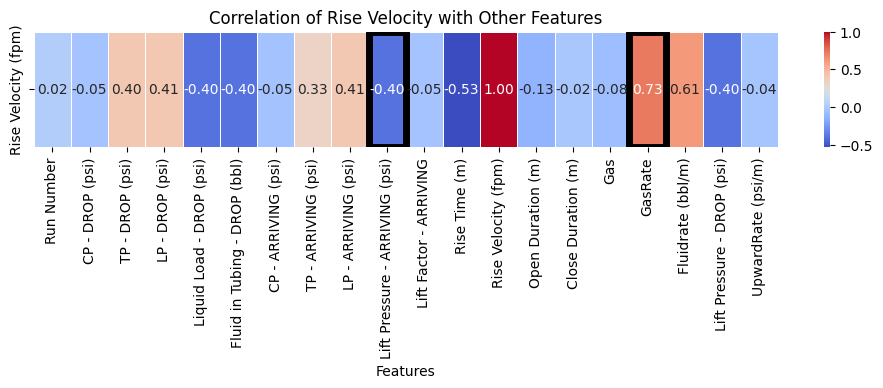

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 1.5))  # Increase width, reduce height for better spacing

# Compute correlation matrix and filter only "Rise Velocity (fpm)"
rise_velocity_corr = df_z.corr()[["Rise Velocity (fpm)"]].T  # Transpose to make it horizontal

# Create heatmap
ax = sns.heatmap(
    rise_velocity_corr, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f", 
    linewidths=0.5, 
    cbar=True,
    annot_kws={"size": 10},  # Increase annotation text size
    square=False  # Ensures rectangular boxes
)

# Identify the column indices of "Lift Pressure - ARRIVING (psi)" and "Gas Rate"
highlight_features = ["Lift Pressure - ARRIVING (psi)", "GasRate"]
col_indices = [rise_velocity_corr.columns.get_loc(feature) for feature in highlight_features]

# Add more visible rectangle highlights
for col_idx in col_indices:
    ax.add_patch(plt.Rectangle(
        (col_idx, 0), 1, 1, 
        fill=False, 
        edgecolor='black',  # Highlight color
        lw=5,  # Increase line width for better visibility
        linestyle='solid',  # Solid line for emphasis
        alpha=1  # Fully opaque for maximum clarity
    ))

plt.title('Correlation of Rise Velocity with Other Features')
plt.xlabel('Features')
plt.xticks(rotation=90, ha='center')  # Ensure feature names are straight
plt.show()


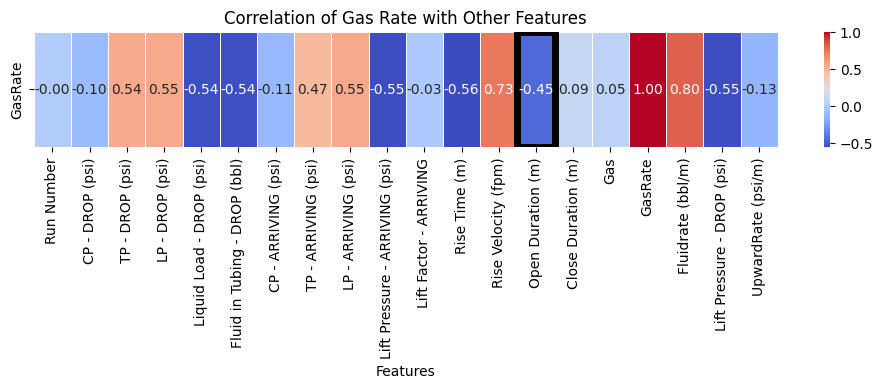

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 1.5))  # Increase width, reduce height for better spacing

# Compute correlation matrix and filter only "Rise Velocity (fpm)"
rise_velocity_corr = df_z.corr()[['GasRate']].T  # Transpose to make it horizontal

# Create heatmap
ax = sns.heatmap(
    rise_velocity_corr, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f", 
    linewidths=0.5, 
    cbar=True,
    annot_kws={"size": 10},  # Increase annotation text size
    square=False  # Ensures rectangular boxes
)

# Identify the column index of "Lift Pressure - ARRIVING (psi)"
col_idx = rise_velocity_corr.columns.get_loc("Open Duration (m)")

# Add a more visible rectangle highlight
ax.add_patch(plt.Rectangle(
    (col_idx, 0), 1, 1, 
    fill=False, 
    edgecolor='black',  # Change to bright color for better visibility
    lw=5,  # Increase line width
    linestyle='solid',  # Change to dashed for more emphasis (optional)
    alpha=1  # Keep it fully opaque for maximum visibility
))

plt.title('Correlation of Gas Rate with Other Features')
plt.xlabel('Features')
plt.xticks(rotation=90, ha='center')  # Ensure feature names are straight
plt.show()


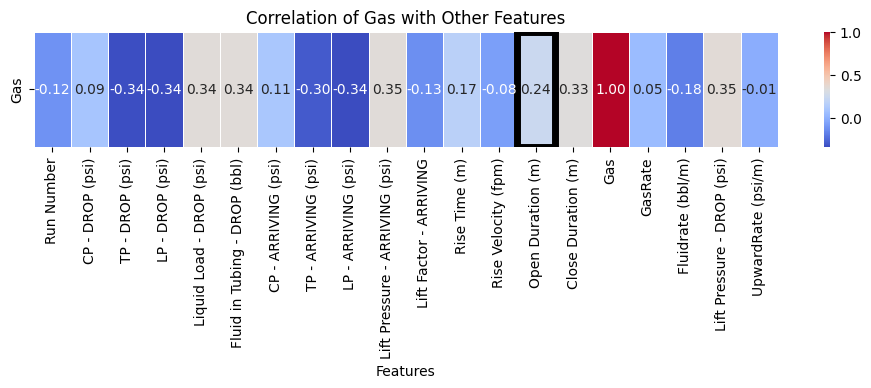

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 1.5))  # Increase width, reduce height for better spacing

# Compute correlation matrix and filter only "Rise Velocity (fpm)"
rise_velocity_corr = df_z.corr()[['Gas']].T  # Transpose to make it horizontal

# Create heatmap
ax = sns.heatmap(
    rise_velocity_corr, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f", 
    linewidths=0.5, 
    cbar=True,
    annot_kws={"size": 10},  # Increase annotation text size
    square=False  # Ensures rectangular boxes
)

# Identify the column index of "Lift Pressure - ARRIVING (psi)"
col_idx = rise_velocity_corr.columns.get_loc("Open Duration (m)")

# Add a more visible rectangle highlight
ax.add_patch(plt.Rectangle(
    (col_idx, 0), 1, 1, 
    fill=False, 
    edgecolor='black',  # Change to bright color for better visibility
    lw=5,  # Increase line width
    linestyle='solid',  # Change to dashed for more emphasis (optional)
    alpha=1  # Keep it fully opaque for maximum visibility
))

plt.title('Correlation of Gas with Other Features')
plt.xlabel('Features')
plt.xticks(rotation=90, ha='center')  # Ensure feature names are straight
plt.show()


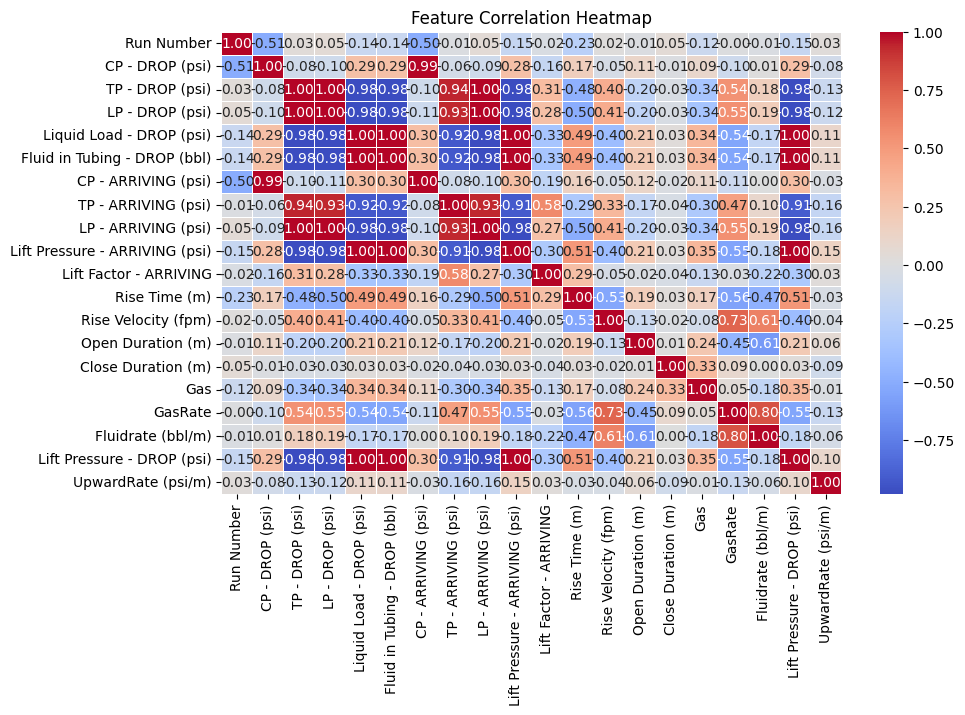

In [25]:
# drop column form df

plt.figure(figsize=(10, 6))
sns.heatmap(df_z.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


# Selecting Best Cycles

In [27]:
# Create a copy of the dataframe to avoid modifying the original data
best_cycles = df_z.copy()

# Define thresholds (75th percentile for gas rate)
gas_rate_threshold = best_cycles['GasRate'].quantile(0.75)

# Identify runs where both conditions are met
good_runs = best_cycles[(best_cycles['GasRate'] >= gas_rate_threshold)]

# Find indices of qualifying runs
good_indices = good_runs.index

# Include the next run after each selected run
selected_indices = set(good_indices) | set(good_indices + 1)

# Ensure indices are within dataset bounds
selected_indices = [idx for idx in selected_indices if idx < len(best_cycles)]

# Convert to list for iteration
selected_indices = sorted(selected_indices)

# Remove both current and next rows if the next row has NaN in "Gas"
final_selected_indices = []
i = 0
while i < len(selected_indices):
    idx = selected_indices[i]
    next_idx = idx + 1

    # If next row exists and has NaN in "Gas", skip both rows
    if next_idx in selected_indices and pd.isna(best_cycles.loc[next_idx, 'Gas']):
        i += 2  # Skip both current and next row
    else:
        final_selected_indices.append(idx)
        i += 1  # Move to the next index

# Filter dataset with the final selected indices
filtered_best_cycles = best_cycles.loc[final_selected_indices]

# Save the filtered runs
filtered_best_cycles.to_csv('best_cycles.csv', index=False)

In [28]:
df_best = pd.read_csv('./best_cycles.csv')

In [29]:
# Create Plotly figure
fig = go.Figure()

# Add scatter plot (point cloud)
fig.add_trace(go.Scatter(
    x=df_best['Rise Velocity (fpm)'],
    y=df_best['GasRate'],
    mode='markers',
    marker=dict(size=6, color='green', opacity=1),
    name='Gas Rate'
))

# Customize layout
fig.update_layout(
    title='Rise Velocity vs Gas Rate',
    xaxis_title='Rise Velocity (fpm)',
    yaxis_title='Gas Rate',
    xaxis_range=[200, 3000],  # Set x-axis limits (adjust as needed)
    template='plotly_white'
)

# Show plot
fig.show()
